In [ ]:
#installing pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=349c470fed8982e8124cf068599afae892a65323cf41a845bd77283b223ba359
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
#initializing the pyspark session

from pyspark.sql import SparkSession
import pyspark

from pyspark.sql import SparkSession
import pyspark
conf = pyspark.SparkConf().setAppName("MASTER_2").setMaster("local")
conf.set("spark.sql.caseSensitive", "true")
#conf.set("spark.debug.maxToStringFields", "100")
spark = SparkSession.builder.config(conf=conf).appName('MASTER_2').getOrCreate()

spark

In [ ]:
#importing dataset into df
df = spark.read.json("/content/Arts_Crafts_and_Sewing.json")
df.show(10)

+----------+-----+-------+--------------------+-----------+--------------+---------------+--------------------+--------------------+--------------+--------+----+
|      asin|image|overall|          reviewText| reviewTime|    reviewerID|   reviewerName|               style|             summary|unixReviewTime|verified|vote|
+----------+-----+-------+--------------------+-----------+--------------+---------------+--------------------+--------------------+--------------+--------+----+
|0449819906| null|    5.0|I've read this bo...| 11 6, 2013|A3U4E9PIZ8OWH1| Shirley Curtis|{null, null, null...|   A  WONDERFUL BOOK|    1383696000|    true|   4|
|0449819906| null|    5.0|Nicely written di...|02 28, 2017|A3945D2TJ0PI86|       M. Smith|{null, null, null...|                Nice|    1488240000|    true|null|
|0449819906| null|    5.0|             love it|02 25, 2017|A2WZK72HLQ7SPT|Amazon Customer|{null, null, null...|          Five Stars|    1487980800|    true|null|
|0449819906| null|    5.0|Go

In [ ]:
#printing structure of the dataset

df.printSchema()

root
 |-- asin: string (nullable = true)
 |-- image: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- overall: double (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- style: struct (nullable = true)
 |    |-- Color Name:: string (nullable = true)
 |    |-- Color:: string (nullable = true)
 |    |-- Design:: string (nullable = true)
 |    |-- Format:: string (nullable = true)
 |    |-- Item Display Length:: string (nullable = true)
 |    |-- Item Package Quantity:: string (nullable = true)
 |    |-- Length:: string (nullable = true)
 |    |-- Package Quantity:: string (nullable = true)
 |    |-- Package Type:: string (nullable = true)
 |    |-- Pattern:: string (nullable = true)
 |    |-- Product Packaging:: string (nullable = true)
 |    |-- Size Name:: string (nullable = true)
 |    |-- Size:: string (nullable = tru

In [ ]:
#printing number of rows in the dataset

df.count()

56349

In [ ]:
#printing number of columns in the dataset

len(df.columns)

12

In [ ]:
#printing last 10 rows of database

df.tail(10)

[Row(asin='B01HJHR2PM', image=None, overall=3.0, reviewText="these didn't work well for the purpose I bought them for. and be careful not to shake them too much. read the directions carefully.", reviewTime='09 11, 2017', reviewerID='AUUS793TRMKMS', reviewerName='david', style=None, summary="these didn't work well for the purpose I bought them ...", unixReviewTime=1505088000, verified=True, vote=None),
 Row(asin='B01HJHR2PM', image=None, overall=5.0, reviewText='VERY NICE', reviewTime='08 14, 2017', reviewerID='ANAQ22781L3H3', reviewerName='armand minghi', style=None, summary='Five Stars', unixReviewTime=1502668800, verified=True, vote=None),
 Row(asin='B01HJHR2PM', image=None, overall=5.0, reviewText='Good quality... Bright colors.. Very happy with purchase Thanks', reviewTime='01 31, 2017', reviewerID='ADZ3UGXZ7GOLQ', reviewerName='chichilover', style=None, summary='Good value', unixReviewTime=1485820800, verified=True, vote=None),
 Row(asin='B01HJHR2PM', image=None, overall=2.0, revi

In [ ]:
#changing name of the reviewerID, asin, overall, and reviewText columns

df = df.withColumnRenamed("reviewerID","userID").withColumnRenamed("asin","itemID").withColumnRenamed("overall","rating").withColumnRenamed("reviewText","review").withColumnRenamed("summary","review_summary")

In [ ]:
#printing the summary of the database; number of rows, mean, max, min values of all columns data

#df.summary().show()

In [ ]:
#creating new dataset of only itemID, userID, rating, review, review_summary columns from old dataset

df_new = df['itemID','userID','rating','review','review_summary']
df_new=df_new.limit(20000)

In [ ]:
#printing 10 rows of new dataset

df_new.show(10)

+----------+--------------+------+--------------------+--------------------+
|    itemID|        userID|rating|              review|      review_summary|
+----------+--------------+------+--------------------+--------------------+
|0449819906|A3U4E9PIZ8OWH1|   5.0|I've read this bo...|   A  WONDERFUL BOOK|
|0449819906|A3945D2TJ0PI86|   5.0|Nicely written di...|                Nice|
|0449819906|A2WZK72HLQ7SPT|   5.0|             love it|          Five Stars|
|0449819906|A1Q7YJ1NPE6E0W|   5.0|Good additional k...|Good Reference in...|
|0449819906|A2846L8Q507JC4|   5.0|A gazillion patte...|Extremely clear, ...|
|0449819906|A3V21ZT37Y242L|   2.0|Just ok. Read bet...|             Just ok|
|0449819906| A1GJKG5OAQQ69|   5.0|The best knitting...|Thank you for the...|
|0449819906|A1IQJ7PGO9I4MI|   5.0|This book is a mo...|         Magnificent|
|0449819906| AW3AYN77DSEA4|   5.0|excellent variety...|          Five Stars|
|0449819906|A3AJK82I35MLKA|   5.0|Another winner M....|         A must have|

In [ ]:
#printing number of rows in new dataset

df_new.count()

20000

In [ ]:
#printing summary of new dataset; number of rows, mean, min, max values of each columns

df_new.describe().toPandas()

,summary,itemID,userID,rating,review,review_summary
0,count,20000,20000,20000,19993,19994
1,mean,2.983018388166736E9,None,4.3758,None,0.0
2,stddev,3.148785545165665E9,None,1.1453121613766941,None,None
3,min,0449819906,A0220159ZRNBTRKLG08H,1.0,"""I am very disappointed with this product. I l...",Beautiful Sparkly Cross/Jesus Fish Stickers!!...
4,max,B0000TQENI,AZZZWDTD5URZ8,5.0,you should by another transfer paper that coas...,~WARNING~ DO NOT BUY THIS


In [ ]:
#printing number of null values occurrences in each column in new dataset

from pyspark.sql.functions import isnan, when, count, col

df_new.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_new.columns]).show()

+------+------+------+------+--------------+
|itemID|userID|rating|review|review_summary|
+------+------+------+------+--------------+
|     0|     0|     0|     7|             6|
+------+------+------+------+--------------+



In [ ]:
#finding all data from dataset where the userID is null

df_new.filter(df_new.userID.isNull()).show()

+------+------+------+------+--------------+
|itemID|userID|rating|review|review_summary|
+------+------+------+------+--------------+
+------+------+------+------+--------------+



In [ ]:
#finding all data from dataset where the itemID is null

df_new.filter(df_new.itemID.isNull()).show()

+------+------+------+------+--------------+
|itemID|userID|rating|review|review_summary|
+------+------+------+------+--------------+
+------+------+------+------+--------------+



In [ ]:
#finding all data from dataset where the rating is null

df_new.filter(df_new.rating.isNull()).show()

+------+------+------+------+--------------+
|itemID|userID|rating|review|review_summary|
+------+------+------+------+--------------+
+------+------+------+------+--------------+



In [ ]:
#finding all data from dataset where the review is null

df_new.filter(df_new.review.isNull()).show()

+----------+--------------+------+------+--------------------+
|    itemID|        userID|rating|review|      review_summary|
+----------+--------------+------+------+--------------------+
|B00004THXH|A2OPTG6L4Z8UJC|   5.0|  null|          Five Stars|
|B00004Z2U8|A10QMQ0WC54KLU|   5.0|  null|          Five Stars|
|B00004Z2UD| A9BK461172UHX|   4.0|  null|          Four Stars|
|B00006IAHD|A1ROVL4AWYM9D6|   5.0|  null|                null|
|B00006IDOR| AT95J6Z1N9VW1|   5.0|  null|          Five Stars|
|B00006IE1Q|A23UV1HWEOGT0E|   5.0|  null|          Five Stars|
|B00006IFAG| AVBZUGY2J2T91|   5.0|  null|Very fun to draw ...|
+----------+--------------+------+------+--------------------+



In [ ]:
#finding all data from dataset where the review_summary is null

df_new.filter(df_new.review_summary.isNull()).show()

+----------+--------------+------+--------------------+--------------+
|    itemID|        userID|rating|              review|review_summary|
+----------+--------------+------+--------------------+--------------+
|B00004THXH|A2IHAQY2JV6WR7|   5.0|Just what I was l...|          null|
|B00006IAHD|A1ROVL4AWYM9D6|   5.0|                null|          null|
|B00006IAGW| AV6UUM16WE8RE|   5.0|Perfect! Used the...|          null|
|B00006IC2T|A2HWP7F43XLNG7|   5.0|  Works as intended.|          null|
|B00006IDY9|A2QCPLBHH6GF9T|   5.0|Paper worked grea...|          null|
|B00006IFGJ|A13KDZG6350VST|   5.0|It arrived 3 days...|          null|
+----------+--------------+------+--------------------+--------------+



In [ ]:
#grouping data from dataset by the rating column and ordering it in ascending order
#we only have 5.0, 4.0, 3.0, 2.0, 1.0 and nan ratings

df_col = df_new.groupBy('rating').count().orderBy('count', ascending=False)
df_col.show(100)

+------+-----+
|rating|count|
+------+-----+
|   5.0|13934|
|   4.0| 2791|
|   3.0| 1342|
|   1.0| 1210|
|   2.0|  723|
+------+-----+



<AxesSubplot:ylabel='rating'>

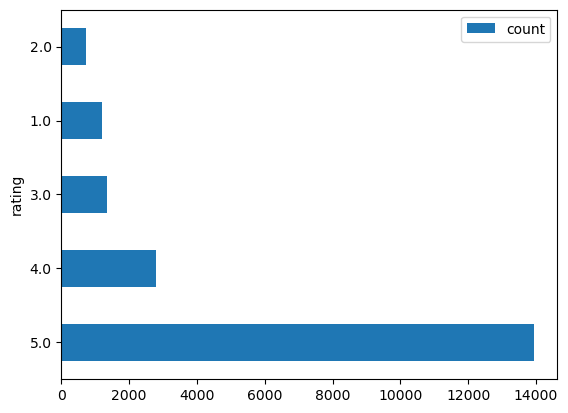

In [ ]:
#visualizing the data from previous task using plot bar

import matplotlib.pyplot as plt
import numpy as np

pdf1=df_col.toPandas()
pdf1.plot(kind='barh',x='rating',y='count')

In [ ]:
#droping and deleting all values that are null in review_summary and review columns

df_new = df_new.na.drop(subset=["review_summary","review"])

In [ ]:
#printing all data that is null in the review_summary; we do not have any because we deleted them

df_new.filter(df_new.review_summary.isNull()).show()

+------+------+------+------+--------------+
|itemID|userID|rating|review|review_summary|
+------+------+------+------+--------------+
+------+------+------+------+--------------+



In [ ]:
#printing all data that is null in the review; we do not have any because we deleted them

df_new.filter(df_new.review.isNull()).show()

+------+------+------+------+--------------+
|itemID|userID|rating|review|review_summary|
+------+------+------+------+--------------+
+------+------+------+------+--------------+



In [ ]:
#grouping data from dataset by the rating column and ordering it in ascending order
#we only have 5.0, 4.0, 3.0, 2.0 and 1.0 ratings

df_col1 = df_new.groupBy('rating').count().orderBy('rating', ascending=False)
df_col1.show(100)

+------+-----+
|rating|count|
+------+-----+
|   5.0|13923|
|   4.0| 2790|
|   3.0| 1342|
|   2.0|  723|
|   1.0| 1210|
+------+-----+



In [ ]:
#printing precentage of the rating from whole dataset

print('precentage of the rating 5:', 228952/332069 *100)
print('precentage of the rating 4:', 44995/332069 *100)
print('precentage of the rating 3:', 22519/332069 *100)
print('precentage of the rating 2:', 13319/332069 *100)
print('precentage of the rating 1:', 22284/332069 *100)

precentage of the rating 5: 68.94711641255282
precentage of the rating 4: 13.549894750789745
precentage of the rating 3: 6.781421933393361
precentage of the rating 2: 4.0109133945053586
precentage of the rating 1: 6.710653508758722


<AxesSubplot:ylabel='rating'>

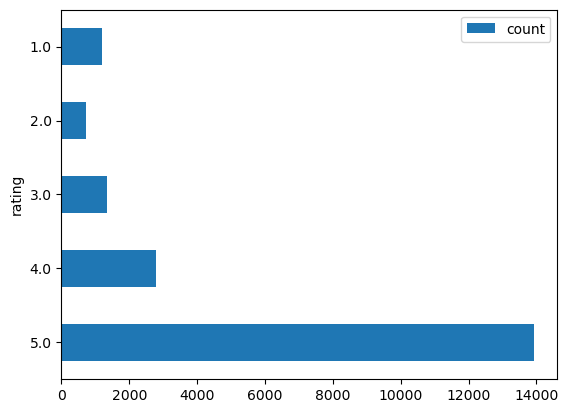

In [ ]:
#visualizing the data of grouping all reviews based on the rating value

pdf2=df_col1.toPandas()
pdf2.plot(kind='barh',x='rating',y='count')

In [ ]:
#grouping all data based on itemID and counting the occurance of the items
#printing first 10 most occuring items

df_col2 = df_new.groupBy('itemID').count().orderBy('count', ascending=False)
df_col2.show(10)

+----------+-----+
|    itemID|count|
+----------+-----+
|B00004THXH| 1252|
|B00006IFGJ| 1200|
|B0000302YN|  891|
|B00004Z2UB|  850|
|B00006IC2T|  724|
|B00006B8FS|  713|
|B00004Z2UD|  707|
|B00006IFAQ|  603|
|B00006IE1Q|  566|
|B00006IFAC|  499|
+----------+-----+
only showing top 10 rows



In [ ]:
#grouping all data based on userID and counting the occurance of the user
#printing first 10 most occuring users in dataset

df_col3 = df_new.groupBy('userID').count().orderBy('count', ascending=False)
df_col3.show(10)

+--------------+-----+
|        userID|count|
+--------------+-----+
|A2PF64RBR1G1SZ|    7|
|A3E5V5TSTAY3R9|    6|
|A3EIZZKGWRKHYE|    5|
| A1FI57YYOLVXE|    4|
|A2MFCGYEXF1XGX|    4|
|A2KMKGZDQYPSL8|    4|
|A1AHTU20THVAC2|    4|
|A1R5SZFGSEVIOH|    4|
|A1NRALDHJR8QEM|    4|
|A39650P2CZUUC9|    3|
+--------------+-----+
only showing top 10 rows



In [ ]:
#select user with id ALYZJ7W14YS26 and print the summary of users occurrence, theirs average, min, max rating value

df.filter(df.userID == "ALYZJ7W14YS26").describe().show()

+-------+-------------+-------------------+--------------------+-----------+-------------+------------+--------------------+--------------------+------------------+
|summary|       itemID|             rating|              review| reviewTime|       userID|reviewerName|      review_summary|      unixReviewTime|              vote|
+-------+-------------+-------------------+--------------------+-----------+-------------+------------+--------------------+--------------------+------------------+
|  count|          208|                208|                 208|        208|          208|         208|                 208|                 208|               105|
|   mean|1.574866745E9|  4.865384615384615|                null|       null|         null|        null|                null|1.4291868461538463E9| 9.438095238095238|
| stddev|         null|0.47258549430130226|                null|       null|         null|        null|                null|2.3740897774562106E7|15.483815253306751|
|    min| 

In [ ]:
#print the summary of dataset without the null values

df_new.describe().toPandas()

,summary,itemID,userID,rating,review,review_summary
0,count,19988,19988,19988,19988,19988
1,mean,2.983018388166736E9,None,4.3754752851711025,None,0.0
2,stddev,3.148785545165665E9,None,1.1455592075808636,None,None
3,min,0449819906,A0220159ZRNBTRKLG08H,1.0,"""I am very disappointed with this product. I l...",Beautiful Sparkly Cross/Jesus Fish Stickers!!...
4,max,B0000TQENI,AZZZWDTD5URZ8,5.0,you should by another transfer paper that coas...,~WARNING~ DO NOT BUY THIS


In [ ]:
#printing the distinct/unique values of userID, itemID - printing all unique users and items that are in the dataset

from pyspark.sql.functions import count as _count
from pyspark.sql.functions import countDistinct

df_new.select(countDistinct('userID')).show()
df_new.select(countDistinct('itemID')).show()

+----------------------+
|count(DISTINCT userID)|
+----------------------+
|                 19548|
+----------------------+

+----------------------+
|count(DISTINCT itemID)|
+----------------------+
|                   206|
+----------------------+



In [ ]:
#displaying the example of review text

df_new.select('review_summary').show(2)

+-----------------+
|   review_summary|
+-----------------+
|A  WONDERFUL BOOK|
|             Nice|
+-----------------+
only showing top 2 rows



In [ ]:
#NLP - starting NLP

In [ ]:
#creating new dataframe of only review and rating columns

df_new

DataFrame[itemID: string, userID: string, rating: double, review: string, review_summary: string]

In [ ]:
#selecting only review column and transforming it to dataframe

df_review = df_new.select('review')
df_review = df_review.toPandas()

In [ ]:
df_review

,review
0,I've read this book already and I've got plans...
1,Nicely written directions.
2,love it
3,Good additional knitting reference to have ava...
4,"A gazillion pattern stitches, lucidly explaine..."
...,...
19983,I have used this item before and found it is w...
19984,"It's a tight fit in our shower space, but it w..."
19985,Product was as advertised. Nice rack & very h...
19986,"I love this clothes dryer--in the winter, you ..."


In [ ]:
#printing 10th review text

df_review['review'][0]

"I've read this book already and I've got plans for using it in future projects.  I'm DELIGHTED with the patterns in it and the advice and suggestions are just as good as you would expect from Melissa Leapman.  I'm so glad that I bought this.  As a lifelong and addicted knitter, this has been a valuable addition to my already good sized book collection.  Thanks Melissa for this very special knitting treat."

In [ ]:
#calculating total words of every review text for every row and saving it as new column in the dataframe

df_review['totalwords'] = [len(x.split()) for x in df_review['review'].tolist()]

In [ ]:
#calculating total char of every review text for every row and saving it as new column in the dataframe

df_review['totalchar'] = [len(x) for x in df_review['review'].tolist()]

In [ ]:
#calculating word density of every review text for every row and saving it as new column in the dataframe

df_review['worddensity'] = df_review['totalchar'] / (df_review['totalwords']+1)

In [ ]:
#displaying newly made dataframe

df_review

,review,totalwords,totalchar,worddensity
0,I've read this book already and I've got plans...,72,408,5.589041
1,Nicely written directions.,3,26,6.500000
2,love it,2,7,2.333333
3,Good additional knitting reference to have ava...,44,236,5.244444
4,"A gazillion pattern stitches, lucidly explaine...",53,337,6.240741
...,...,...,...,...
19983,I have used this item before and found it is w...,20,96,4.571429
19984,"It's a tight fit in our shower space, but it w...",144,771,5.317241
19985,Product was as advertised. Nice rack & very h...,33,185,5.441176
19986,"I love this clothes dryer--in the winter, you ...",223,1213,5.415179


In [ ]:
#counting all words in the dataframe

df_review['totalwords'].sum()

720225

In [ ]:
#counting all chars in the dataframe

df_review['totalchar'].sum()

3877482

In [ ]:
#printing summary of the dataframe with totalwords, totalchar, worddensity columns; printing its mean, min, max values

df_review.describe()

,totalwords,totalchar,worddensity
count,19988.000000,19988.000000,19988.000000
mean,36.032870,193.990494,4.950268
std,51.881773,281.969463,0.853191
min,1.000000,1.000000,0.500000
25%,7.000000,41.000000,4.658145
50%,21.000000,114.500000,5.065682
75%,43.000000,230.000000,5.400000
max,1134.000000,6082.000000,26.666667


In [ ]:
#creating a function for NLP methods; removal of stop words and puncations; lemmatization and tokenization

#!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

nltk.download('all')

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))

words = set(nltk.corpus.words.words())

def tokenization(text):

    text = text.lower()

    #remove punctuation and transforming it into tokens
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    word_tokens = tokenizer.tokenize(text)

    #remove stop words
    word_tokens2 = [w for w in word_tokens if not w.lower() in stop_words]

    #lemmatization
    word_tokens4 = [lemmatizer.lemmatize(w, 'v') for w in word_tokens2 if not '' ]

    return(word_tokens4)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\naida\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\naida\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\naida\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\naida\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\naida\AppData\Roaming\nltk_data...
[nltk_data]    | 

In [ ]:
#example of newly created function

tokenization('Eighty-seven miles to go, yet. 33 Onward!')

['eighty', 'seven', 'miles', 'go', 'yet', 'onward']

In [ ]:
#applying it to the whole dataset; adding new column words in the dataset and storing it there

df_review['words'] = df_review['review'].apply(lambda x : tokenization(x))

In [ ]:
#displaying the new dataset with new column words - column after NLP

df_review

,review,totalwords,totalchar,worddensity,words
0,I've read this book already and I've got plans...,72,408,5.589041,"[read, book, already, get, plan, use, future, ..."
1,Nicely written directions.,3,26,6.500000,"[nicely, write, directions]"
2,love it,2,7,2.333333,[love]
3,Good additional knitting reference to have ava...,44,236,5.244444,"[good, additional, knit, reference, available,..."
4,"A gazillion pattern stitches, lucidly explaine...",53,337,6.240741,"[gazillion, pattern, stitch, lucidly, explain,..."
...,...,...,...,...,...
19983,I have used this item before and found it is w...,20,96,4.571429,"[use, item, find, well, worth, price, save, mo..."
19984,"It's a tight fit in our shower space, but it w...",144,771,5.317241,"[tight, fit, shower, space, work, expect, allo..."
19985,Product was as advertised. Nice rack & very h...,33,185,5.441176,"[product, advertise, nice, rack, handy, larger..."
19986,"I love this clothes dryer--in the winter, you ...",223,1213,5.415179,"[love, clothe, dryer, winter, hang, inside, sh..."


In [ ]:
#concatenating all words rows into one big text - we are left with one big text of words

all_reviews_raw = []
all_reviews =[all_reviews_raw.extend(x) for x in df_review['words']]

In [ ]:
all_reviews_raw

['read',
 'book',
 'already',
 'get',
 'plan',
 'use',
 'future',
 'project',
 'delight',
 'pattern',
 'advice',
 'suggestions',
 'good',
 'would',
 'expect',
 'melissa',
 'leapman',
 'glad',
 'buy',
 'lifelong',
 'addict',
 'knitter',
 'valuable',
 'addition',
 'already',
 'good',
 'size',
 'book',
 'collection',
 'thank',
 'melissa',
 'special',
 'knit',
 'treat',
 'nicely',
 'write',
 'directions',
 'love',
 'good',
 'additional',
 'knit',
 'reference',
 'available',
 'electronic',
 'format',
 'like',
 'easy',
 'jump',
 'one',
 'bite',
 'information',
 'another',
 'since',
 'sure',
 'link',
 'topics',
 'would',
 'available',
 'kindle',
 'format',
 'gazillion',
 'pattern',
 'stitch',
 'lucidly',
 'explain',
 'illustrations',
 'one',
 'page',
 'instructions',
 'thorough',
 'guide',
 'basic',
 'techniques',
 'appendix',
 'get',
 'full',
 'pattern',
 'stitch',
 'easily',
 'adapt',
 'straightforward',
 'knit',
 'project',
 'straight',
 'circular',
 'needle',
 'useful',
 'book',
 'ok',
 '

In [ ]:
#printing number of only unique words from the all_reviews_raw - big text

len(set(all_reviews_raw))

12628

In [ ]:
#finding most occuring words from all text in the dataset

from nltk.text import FreqDist
review_fd = FreqDist(all_reviews_raw)
review_fd

FreqDist({'use': 7451, 'great': 5559, 'color': 4423, 'work': 4099, 'good': 3492, 'make': 3257, 'get': 3141, 'buy': 3087, 'love': 3055, 'like': 2814, ...})

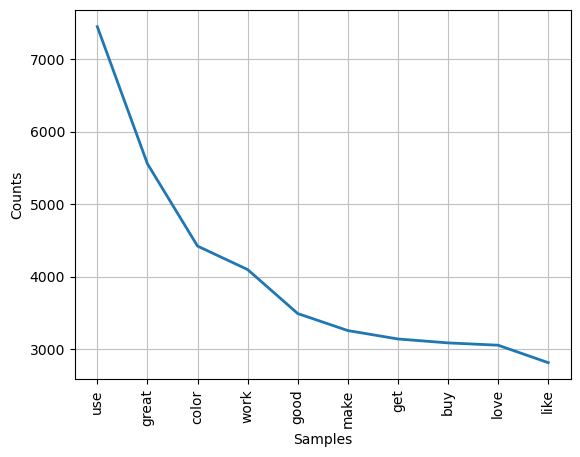

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
#plot of 10 common words from whole dataset

review_fd.plot(10)

In [ ]:
df_review_convert = df_new['review','rating'].toPandas()
df_review['rating']  = df_review_convert['rating']

In [ ]:
#df_review['rating'] = df_review[df_review['rating'] == 5][:2790]

#data = df_review.groupby(['rating']).count()
#data

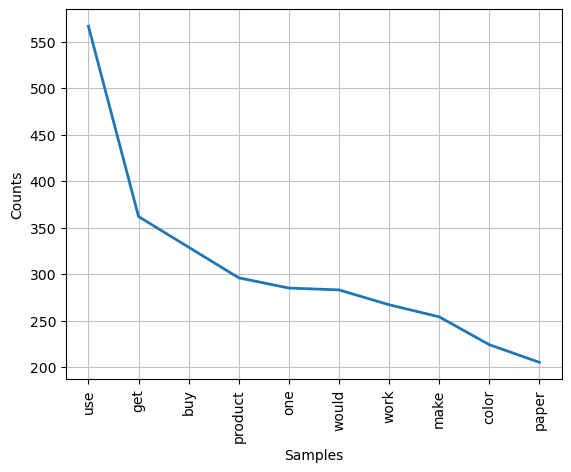

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
#finding most occuring words from review text in the dataset that are rated with 1.0

all_reviews_1_raw = []
df_1 = df_review[df_review['rating'] == 1]
[all_reviews_1_raw.extend(x) for x in df_1['words']]

#plot of 10 common words from whole dataset that are rated with 1.0
review_1_fd = FreqDist(all_reviews_1_raw)
review_1_fd.plot(10)

In [ ]:
#printing most occuring words from review text in the dataset that are rated with 1.0

review_1_fd

FreqDist({'use': 567, 'get': 362, 'buy': 329, 'product': 296, 'one': 285, 'would': 283, 'work': 267, 'make': 254, 'color': 224, 'paper': 205, ...})

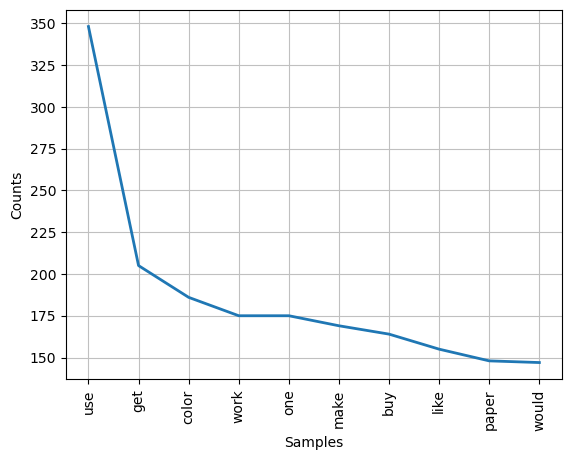

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
#finding most occuring words from review text in the dataset that are rated with 2.0

all_reviews_2_raw = []
df_2 = df_review[df_review['rating'] == 2]
[all_reviews_2_raw.extend(x) for x in df_2['words']]

#ploting most occuring words from review text in the dataset that are rated with 2.0

from nltk.text import FreqDist
review_2_fd = FreqDist(all_reviews_2_raw)
review_2_fd.plot(10)

In [ ]:
#printing most occuring words from review text in the dataset that are rated with 2.0

review_2_fd

FreqDist({'use': 348, 'get': 205, 'color': 186, 'work': 175, 'one': 175, 'make': 169, 'buy': 164, 'like': 155, 'paper': 148, 'would': 147, ...})

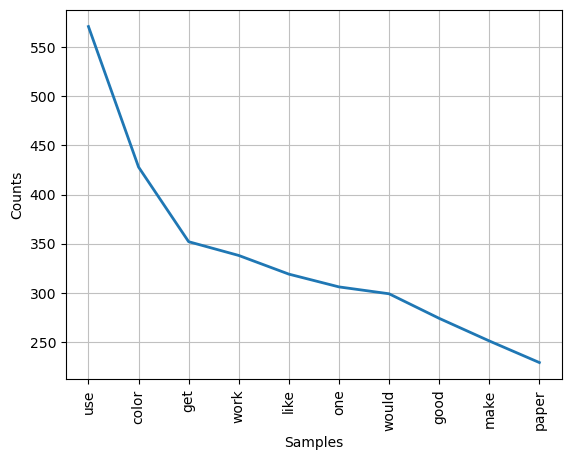

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
#finding most occuring words from review text in the dataset that are rated with 3.0

all_reviews_3_raw = []
df_3 = df_review[df_review['rating'] == 3]
all_reviews_3 =[all_reviews_3_raw.extend(x) for x in df_3['words']]

#ploting most occuring words from review text in the dataset that are rated with 3.0

review_3_fd = FreqDist(all_reviews_3_raw)
review_3_fd.plot(10)

In [ ]:
#printing most occuring words from review text in the dataset that are rated with 3.0

review_3_fd

FreqDist({'use': 571, 'color': 428, 'get': 352, 'work': 338, 'like': 319, 'one': 306, 'would': 299, 'good': 274, 'make': 251, 'paper': 229, ...})

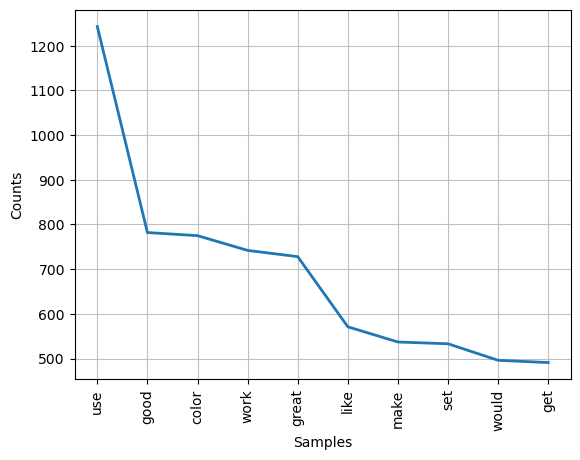

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
#finding most occuring words from review text in the dataset that are rated with 4.0

all_reviews_4_raw = []
df_4 = df_review[df_review['rating'] == 4]
[all_reviews_4_raw.extend(x) for x in df_4['words']]

#ploting most occuring words from review text in the dataset that are rated with 4.0

review_4_fd = FreqDist(all_reviews_4_raw)
review_4_fd.plot(10)

In [ ]:
#printing most occuring words from review text in the dataset that are rated with 4.0

review_4_fd

FreqDist({'use': 1243, 'good': 782, 'color': 775, 'work': 742, 'great': 728, 'like': 571, 'make': 537, 'set': 533, 'would': 496, 'get': 491, ...})

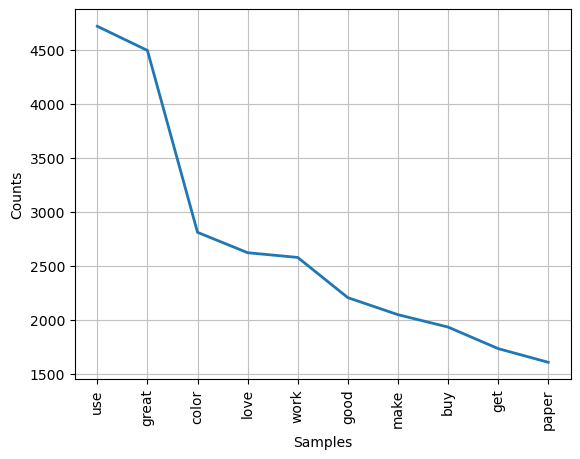

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [ ]:
#finding most occuring words from review text in the dataset that are rated with 5.0

all_reviews_5_raw = []
df_5 = df_review[df_review['rating'] == 5]
[all_reviews_5_raw.extend(x) for x in df_5['words']]

#ploting most occuring words from review text in the dataset that are rated with 5.0
from nltk.text import FreqDist
review_5_fd = FreqDist(all_reviews_5_raw)
review_5_fd.plot(10)

In [ ]:
#printing most occuring words from review text in the dataset that are rated with 2.0

review_5_fd

FreqDist({'use': 4722, 'great': 4498, 'color': 2810, 'love': 2621, 'work': 2577, 'good': 2204, 'make': 2046, 'buy': 1931, 'get': 1731, 'paper': 1604, ...})

In [ ]:
df_review.groupby(['rating']).count()

,review,totalwords,totalchar,worddensity,words
rating,,,,,
1.0,1210,1210,1210,1210,1210
2.0,723,723,723,723,723
3.0,1342,1342,1342,1342,1342
4.0,2790,2790,2790,2790,2790
5.0,13923,13923,13923,13923,13923


In [ ]:
#END

In [ ]:
#BUILDING ALGO

In [ ]:
df_review['clean_sent'] = [' '.join(words) for words in df_review['words']]
df_review

,review,totalwords,totalchar,worddensity,words,rating,clean_sent
0,I've read this book already and I've got plans...,72,408,5.589041,"[read, book, already, get, plan, use, future, ...",5.0,read book already get plan use future project ...
1,Nicely written directions.,3,26,6.500000,"[nicely, write, directions]",5.0,nicely write directions
2,love it,2,7,2.333333,[love],5.0,love
3,Good additional knitting reference to have ava...,44,236,5.244444,"[good, additional, knit, reference, available,...",5.0,good additional knit reference available elect...
4,"A gazillion pattern stitches, lucidly explaine...",53,337,6.240741,"[gazillion, pattern, stitch, lucidly, explain,...",5.0,gazillion pattern stitch lucidly explain illus...
...,...,...,...,...,...,...,...
19983,I have used this item before and found it is w...,20,96,4.571429,"[use, item, find, well, worth, price, save, mo...",5.0,use item find well worth price save money cost...
19984,"It's a tight fit in our shower space, but it w...",144,771,5.317241,"[tight, fit, shower, space, work, expect, allo...",3.0,tight fit shower space work expect allow air d...
19985,Product was as advertised. Nice rack & very h...,33,185,5.441176,"[product, advertise, nice, rack, handy, larger...",4.0,product advertise nice rack handy larger size ...
19986,"I love this clothes dryer--in the winter, you ...",223,1213,5.415179,"[love, clothe, dryer, winter, hang, inside, sh...",5.0,love clothe dryer winter hang inside shower ro...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool.
vectorizer = CountVectorizer(analyzer = "word", \
                             tokenizer = None, \
                            preprocessor = None, \
                            stop_words = None, \
                            max_features = 5000)
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of
# strings.
train_data_features = vectorizer.fit_transform(df_review['clean_sent'])
# Numpy arrays are easy to work with, so convert the result to an
# array
train_data_features = train_data_features.toarray()

In [ ]:
train_data_features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
print(train_data_features.shape)

(19988, 5000)


In [ ]:
print( df_review['rating'].shape)

(19988,)


In [ ]:
# Check the words in the vocabulary
vocab = vectorizer.get_feature_names()
print(vocab)

['aaa', 'ability', 'able', 'absolute', 'absolutely', 'absorb', 'abstract', 'abundance', 'abuse', 'ac', 'accent', 'accept', 'acceptable', 'access', 'accessible', 'accessories', 'accessory', 'accident', 'accidentally', 'accidents', 'accommodate', 'accompany', 'accomplish', 'accomplishment', 'accord', 'accordingly', 'accordion', 'account', 'accumulate', 'accuracy', 'accurate', 'accurately', 'ache', 'achieve', 'acid', 'acquire', 'across', 'acrylic', 'acrylics', 'act', 'action', 'active', 'activities', 'activity', 'acto', 'actors', 'actual', 'actually', 'ad', 'adapt', 'adapter', 'add', 'addict', 'addition', 'additional', 'additionally', 'additions', 'address', 'adequate', 'adhere', 'adhesion', 'adhesive', 'adhesives', 'adjust', 'adjustable', 'adjustment', 'adjustments', 'admire', 'admit', 'admittedly', 'adorable', 'adore', 'adult', 'adults', 'advance', 'advantage', 'advertise', 'advertize', 'advice', 'advise', 'affect', 'affix', 'afford', 'affordable', 'afghan', 'afghans', 'afraid', 'aftern

C:\Users\naida\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import numpy as np
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)
# For each, print the vocabulary word and the number of times it
# appears in the training set
for tag, count in zip(vocab, dist):
    print(count, tag)

10 aaa
35 ability
429 able
35 absolute
167 absolutely
18 absorb
5 abstract
4 abundance
17 abuse
7 ac
6 accent
12 accept
21 acceptable
22 access
10 accessible
24 accessories
15 accessory
9 accident
23 accidentally
4 accidents
7 accommodate
8 accompany
16 accomplish
5 accomplishment
24 accord
5 accordingly
9 accordion
14 account
6 accumulate
6 accuracy
39 accurate
15 accurately
6 ache
23 achieve
11 acid
5 acquire
73 across
35 acrylic
6 acrylics
10 act
58 action
10 active
24 activities
35 activity
246 acto
4 actors
73 actual
321 actually
12 ad
15 adapt
4 adapter
378 add
8 addict
98 addition
77 additional
11 additionally
5 additions
30 address
26 adequate
51 adhere
6 adhesion
178 adhesive
6 adhesives
65 adjust
13 adjustable
6 adjustment
6 adjustments
13 admire
27 admit
5 admittedly
33 adorable
9 adore
114 adult
36 adults
51 advance
8 advantage
215 advertise
8 advertize
33 advice
17 advise
13 affect
6 affix
28 afford
60 affordable
6 afghan
6 afghans
40 afraid
5 afternoon
12 afterwards
96 ag

In [ ]:
import pandas as pd
feature_dataset = pd.DataFrame(train_data_features, columns=vectorizer.get_feature_names_out())
feature_dataset

,aaa,ability,able,absolute,absolutely,absorb,abstract,abundance,abuse,ac,...,youth,youtube,yr,yrs,yup,zero,zig,zip,ziplock,zipper
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19986,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X = train_data_features
y = df_review['rating']

# split the dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100)
# Fit the forest to the training set, using the bag of words as
# features and the sentiment labels as the response variable
forest = forest.fit(X_train,y_train)

In [ ]:
forest.score(X_test,y_test)

0.7116058029014507

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
y_pred = forest.predict(X_test)
cf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[[3714   50]
  [ 165   69]]

 [[3844   10]
  [ 140    4]]

 [[3711   28]
  [ 247   12]]

 [[3376   61]
  [ 534   27]]

 [[ 194 1004]
  [  67 2733]]]


<AxesSubplot:>

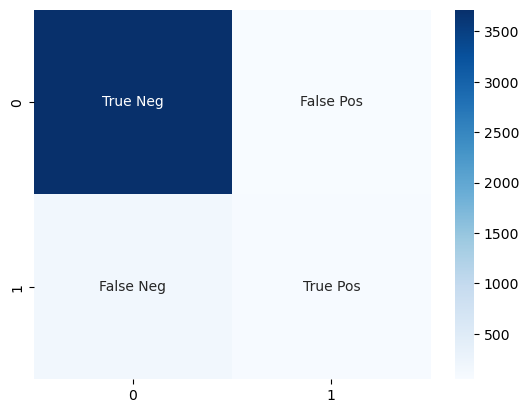

In [ ]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix[0], annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.58      0.29      0.39       234
         2.0       0.29      0.03      0.05       144
         3.0       0.30      0.05      0.08       259
         4.0       0.31      0.05      0.08       561
         5.0       0.73      0.98      0.84      2800

    accuracy                           0.71      3998
   macro avg       0.44      0.28      0.29      3998
weighted avg       0.62      0.71      0.63      3998



In [ ]:
#Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train,y_train)

MultinomialNB()

In [ ]:
naive.score(X_test, y_test)

0.7186093046523262

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
y_pred = naive.predict(X_test)
cf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[[3643  121]
  [ 100  134]]

 [[3801   53]
  [ 135    9]]

 [[3628  111]
  [ 210   49]]

 [[3219  218]
  [ 461  100]]

 [[ 576  622]
  [ 219 2581]]]


<AxesSubplot:>

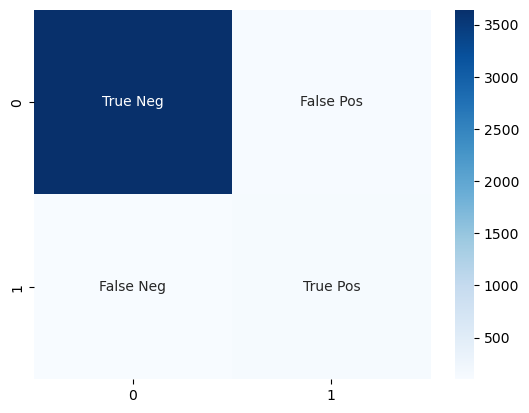

In [ ]:
import seaborn as sns
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix[0], annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.53      0.57      0.55       234
         2.0       0.15      0.06      0.09       144
         3.0       0.31      0.19      0.23       259
         4.0       0.31      0.18      0.23       561
         5.0       0.81      0.92      0.86      2800

    accuracy                           0.72      3998
   macro avg       0.42      0.38      0.39      3998
weighted avg       0.66      0.72      0.68      3998



In [ ]:
y_pred

array([1., 5., 1., ..., 5., 1., 3.])